# Introduction

This project aims to explore the drug discovery field employing machine learning techniques. The chosen target of the project is BRAF (B-Raf proto-oncogene), a serine/threonine protein kinase that plays a critical role in the MAPK signalling pathway and that is involved in various cancers, such as melanomas and colorectal cancers.

Inhibition of BRAF represents a strategy to disrupt the hyperactive MAPK signaling cascade and block the growth of cancer cells presenting BRAF mutations. In fact, several BRAF inhibitors have been investigated in preclinical and clinical settings, showcasing promising anti-tumor activities.

For this reason, the application of machine learning techniques, such as regression models, for BRAF-targeted drug discovery poses an interesting challenge. Specifically, regression models will be employed to predict the bioactivity of different molecules against BRAF. The utilization of PubChem fingerprints and IC50 values will serve as the basis for developing the predictive model.

# Data collection and preprocessing

In [1]:
# Required libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

## Search for target

In [2]:
target = new_client.target
target_query = target.search("BRAF")
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Mus musculus,Serine/threonine-protein kinase B-raf,19.0,False,CHEMBL2331061,"[{'accession': 'P28028', 'component_descriptio...",SINGLE PROTEIN,10090
1,"[{'xref_id': 'P15056', 'xref_name': None, 'xre...",Homo sapiens,Serine/threonine-protein kinase B-raf,17.0,False,CHEMBL5145,"[{'accession': 'P15056', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,BRAF/CRAF,17.0,False,CHEMBL4106189,"[{'accession': 'P04049', 'component_descriptio...",PROTEIN COMPLEX,9606
3,[],Homo sapiens,Protein cereblon/BRAF,16.0,False,CHEMBL4523687,"[{'accession': 'P15056', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
4,[],Homo sapiens,B-raf/RAF proto-oncogene serine/threonine-prot...,15.0,False,CHEMBL3883317,"[{'accession': 'P04049', 'component_descriptio...",PROTEIN FAMILY,9606
5,[],Homo sapiens,RAF serine/threonine protein kinase,13.0,False,CHEMBL3559685,"[{'accession': 'P04049', 'component_descriptio...",PROTEIN FAMILY,9606


Select and retrieve bioactivity data for human Serine/threonine-protein kinase B-raf

In [3]:
targets.iloc[1]

cross_references      [{'xref_id': 'P15056', 'xref_name': None, 'xre...
organism                                                   Homo sapiens
pref_name                         Serine/threonine-protein kinase B-raf
score                                                              17.0
species_group_flag                                                False
target_chembl_id                                             CHEMBL5145
target_components     [{'accession': 'P15056', 'component_descriptio...
target_type                                              SINGLE PROTEIN
tax_id                                                             9606
Name: 1, dtype: object

In [4]:
selected_target_id = targets.target_chembl_id[1]
selected_target_id

'CHEMBL5145'

We will search for bioactivity data for the selected target. This type of data includes experimental measurements of the effects of chemical entities on biological targets. Bioactivities are expressed as quantitative values such as binding affinity, IC50 (half maximal inhibitory concentration), EC50 (half maximal effective concentration), and so on.

We need to filter the activity data to only include data from the selected target and of type IC50.

In [5]:
search = new_client.activity.filter(target_chembl_id=selected_target_id).filter(standard_type="IC50")
search_df = pd.DataFrame.from_dict(search)
search_df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1443255,[],CHEMBL829087,Inhibition of Protein kinase Raf-B binding in ...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,uM,UO_0000065,None,16.0
1,None,None,1666310,[],CHEMBL869911,Inhibition bRaf kinase activity,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,900.0
2,None,None,1666311,[],CHEMBL869911,Inhibition bRaf kinase activity,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,1585.0
3,None,None,1666312,[],CHEMBL869911,Inhibition bRaf kinase activity,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,339.0
4,None,None,1666313,[],CHEMBL869911,Inhibition bRaf kinase activity,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,13.0


In [6]:
print(search_df.shape)

(6878, 46)


IC50 stands for the half-maximal inhibitory concentration. It is a measure used in pharmacology and biochemistry to express the potency of a substance in inhibiting a specific biological or biochemical function. The IC50 value represents the concentration of a compound (such as a drug or inhibitor) needed to inhibit a particular biological or biochemical process by 50%. A lower IC50 value indicates higher potency, as it means that a lower concentration of the substance is required to achieve a 50% inhibition.

In [7]:
pd.to_numeric(search_df.standard_value).describe()

count      6715.000000
mean       3842.705985
std       15331.568179
min           0.020000
25%           8.415000
50%          72.000000
75%         660.000000
max      200000.000000
Name: standard_value, dtype: float64

In [8]:
# Save raw data
search_df.to_csv("bioactivity_data.csv", index=False)

Remove rows with missing data in the standard_value and canonical_smiles columns

In [9]:
filtered_bioactivity_data = search_df[search_df.standard_value.notna()]
filtered_bioactivity_data = filtered_bioactivity_data[filtered_bioactivity_data.canonical_smiles.notna()]
filtered_bioactivity_data

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1443255,[],CHEMBL829087,Inhibition of Protein kinase Raf-B binding in ...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,uM,UO_0000065,None,16.0
1,None,None,1666310,[],CHEMBL869911,Inhibition bRaf kinase activity,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,900.0
2,None,None,1666311,[],CHEMBL869911,Inhibition bRaf kinase activity,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,1585.0
3,None,None,1666312,[],CHEMBL869911,Inhibition bRaf kinase activity,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,339.0
4,None,None,1666313,[],CHEMBL869911,Inhibition bRaf kinase activity,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6873,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24958883,[],CHEMBL5215111,Inhibition of BRAF V600E mutant (unknown origin),B,P15056,V600E,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,uM,UO_0000065,None,4.06
6874,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24958884,[],CHEMBL5215111,Inhibition of BRAF V600E mutant (unknown origin),B,P15056,V600E,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,uM,UO_0000065,None,0.237
6875,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24958885,[],CHEMBL5215111,Inhibition of BRAF V600E mutant (unknown origin),B,P15056,V600E,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,uM,UO_0000065,None,0.688
6876,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24958886,[],CHEMBL5215111,Inhibition of BRAF V600E mutant (unknown origin),B,P15056,V600E,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,uM,UO_0000065,None,4.17


In [10]:
len(filtered_bioactivity_data.canonical_smiles.unique())

4848

In [11]:
filtered_bioactivity_data = filtered_bioactivity_data.drop_duplicates(['canonical_smiles'])
filtered_bioactivity_data

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1443255,[],CHEMBL829087,Inhibition of Protein kinase Raf-B binding in ...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,uM,UO_0000065,None,16.0
1,None,None,1666310,[],CHEMBL869911,Inhibition bRaf kinase activity,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,900.0
2,None,None,1666311,[],CHEMBL869911,Inhibition bRaf kinase activity,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,1585.0
3,None,None,1666312,[],CHEMBL869911,Inhibition bRaf kinase activity,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,339.0
4,None,None,1666313,[],CHEMBL869911,Inhibition bRaf kinase activity,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6860,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24882827,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5156498,Inhibition of N-terminal His-tagged human reco...,B,P15056,V600E,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,6.3
6861,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24882828,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5156498,Inhibition of N-terminal His-tagged human reco...,B,P15056,V600E,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,7.6
6863,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24882867,[],CHEMBL5156504,Inhibition of N-terminal His-tagged human B-Ra...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,12.0
6864,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24896681,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5159476,Inhibition of human recombinant B-raf (416 to ...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,uM,UO_0000065,None,1.774


## Data preprocessing

We will label compounds as active, inactive or intermediate based on their IC50 value.

In [12]:
bioactivity_class = []
for x in pd.to_numeric(filtered_bioactivity_data.standard_value):
    if x <= 1000:
        bioactivity_class.append("active")
    elif x >= 10000:
        bioactivity_class.append("inactive")
    else:
        bioactivity_class.append("intermediate")

In [13]:
filtered_bioactivity_data.insert(filtered_bioactivity_data.shape[1], 'bioactivity_class', bioactivity_class)
filtered_bioactivity_data.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,bioactivity_class
0,None,None,1443255,[],CHEMBL829087,Inhibition of Protein kinase Raf-B binding in ...,B,None,None,BAO_0000190,...,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,uM,UO_0000065,None,16.0,inactive
1,None,None,1666310,[],CHEMBL869911,Inhibition bRaf kinase activity,B,None,None,BAO_0000190,...,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,900.0,active
2,None,None,1666311,[],CHEMBL869911,Inhibition bRaf kinase activity,B,None,None,BAO_0000190,...,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,1585.0,intermediate
3,None,None,1666312,[],CHEMBL869911,Inhibition bRaf kinase activity,B,None,None,BAO_0000190,...,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,339.0,active
4,None,None,1666313,[],CHEMBL869911,Inhibition bRaf kinase activity,B,None,None,BAO_0000190,...,Serine/threonine-protein kinase B-raf,9606,None,None,IC50,nM,UO_0000065,None,13.0,active


Create a new dataframe with the columns that are relevant for our approach: molecule_chembl_id, canonical_smiles, bioactivity_class, standard_value

In [14]:
reduced_bioactivity_data = filtered_bioactivity_data[['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value']]
reduced_bioactivity_data

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL185238,Cc1cccc(-c2n[nH]cc2-c2ccc3ncccc3n2)n1,inactive,16000.0
1,CHEMBL371694,CC(C)(C)c1nc(-c2ccc(F)cc2)c(-c2ccncc2)[nH]1,active,900.0
2,CHEMBL200259,OCc1cccc(-c2[nH]c(-c3ccccc3)nc2-c2ccncc2)c1,intermediate,1585.0
3,CHEMBL68215,Oc1ccc(-c2[nH]c(-c3ccccc3)nc2-c2ccncc2)cc1,active,339.0
4,CHEMBL200863,CC(C)(CNC(=O)Nc1ccc(Cl)cc1)c1nc(-c2ccc(Cl)c(O)...,active,13.0
...,...,...,...,...
6860,CHEMBL5195570,NCCCc1nc(-c2cccc(NS(=O)(=O)c3cc(F)ccc3F)c2F)c(...,active,6.3
6861,CHEMBL5197265,CC(=O)Nc1nccc(-c2sc(CCCN)nc2-c2cccc(NS(=O)(=O)...,active,7.6
6863,CHEMBL5193921,CCN(C)S(=O)(=O)Nc1cccc(-c2nc(C(C)(C)C)sc2-c2cc...,active,12.0
6864,CHEMBL5178459,C[C@@H]1COCCN1c1nc(-c2cccc3[nH]ccc23)nc2ccc(-c...,intermediate,1774.0


In [15]:
reduced_bioactivity_data.to_csv("preprocessed_bioactivity_data.csv", index=False)

# Exploratory data analysis

The Lipinski's Rule of Five is used to assess the drug-likeness of a compound based on its physicochemical properties. The rule is often applied during drug discovery and development to predict whether a compound is likely to have favorable pharmacokinetic and pharmacodynamic properties (ADME). The Rule of Five suggests that a compound is more likely to be an orally active drug if it has the following characteristics:

* Molecular Weight (MW) < 500 Daltons
* Lipophilicity (LogP) < 5
* Hydrogen Bond Donors < 5.
* Hydrogen Bond Acceptors < 10.

In [16]:
import numpy as np
from rdkit.Chem import Descriptors, Lipinski, MolFromSmiles

In [17]:
def lipinski(smiles, chembl_id):
    """The function takes as input the smiles notation of the compounds and returns a data frame with the Lipinski descriptors."""

    # Convert smile notation of each compound to the molecule
    moldata = [MolFromSmiles(x) for x in smiles]

    # Compute the descriptors from the molecule
    MolWt, MolLogP, NumHDonors, NumHAcceptors = [], [], [], []
    for mol in moldata:
        MolWt.append(Descriptors.MolWt(mol))
        MolLogP.append(Descriptors.MolLogP(mol))
        NumHDonors.append(Lipinski.NumHDonors(mol))
        NumHAcceptors.append(Lipinski.NumHAcceptors(mol))

    # Build the dataframe
    res = pd.DataFrame({
        'molecule_chembl_id': chembl_id,
        'MolWt': MolWt,
        'MolLogP': MolLogP,
        'NumHDonors': NumHDonors,
        'NumHAcceptors': NumHAcceptors
    })

    return res

    

In [18]:
lipinski_df = lipinski(reduced_bioactivity_data.canonical_smiles, reduced_bioactivity_data.molecule_chembl_id)
lipinski_df

,molecule_chembl_id,MolWt,MolLogP,NumHDonors,NumHAcceptors
0,CHEMBL185238,287.326,3.39032,1,4
1,CHEMBL371694,295.361,4.57530,1,2
2,CHEMBL200259,327.387,4.29800,2,3
3,CHEMBL68215,313.360,4.51130,2,3
4,CHEMBL200863,496.398,6.25040,4,4
...,...,...,...,...,...
6860,CHEMBL5195570,520.562,3.95870,3,8
6861,CHEMBL5197265,562.599,4.33490,3,8
6863,CHEMBL5193921,446.602,3.75520,2,7
6864,CHEMBL5178459,424.508,4.40370,1,6


Merge both dataframes

In [19]:
merged_bioactivity_data = pd.merge(reduced_bioactivity_data, lipinski_df, on='molecule_chembl_id')
merged_bioactivity_data

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MolWt,MolLogP,NumHDonors,NumHAcceptors
0,CHEMBL185238,Cc1cccc(-c2n[nH]cc2-c2ccc3ncccc3n2)n1,inactive,16000.0,287.326,3.39032,1,4
1,CHEMBL371694,CC(C)(C)c1nc(-c2ccc(F)cc2)c(-c2ccncc2)[nH]1,active,900.0,295.361,4.57530,1,2
2,CHEMBL200259,OCc1cccc(-c2[nH]c(-c3ccccc3)nc2-c2ccncc2)c1,intermediate,1585.0,327.387,4.29800,2,3
3,CHEMBL68215,Oc1ccc(-c2[nH]c(-c3ccccc3)nc2-c2ccncc2)cc1,active,339.0,313.360,4.51130,2,3
4,CHEMBL200863,CC(C)(CNC(=O)Nc1ccc(Cl)cc1)c1nc(-c2ccc(Cl)c(O)...,active,13.0,496.398,6.25040,4,4
...,...,...,...,...,...,...,...,...
4843,CHEMBL5195570,NCCCc1nc(-c2cccc(NS(=O)(=O)c3cc(F)ccc3F)c2F)c(...,active,6.3,520.562,3.95870,3,8
4844,CHEMBL5197265,CC(=O)Nc1nccc(-c2sc(CCCN)nc2-c2cccc(NS(=O)(=O)...,active,7.6,562.599,4.33490,3,8
4845,CHEMBL5193921,CCN(C)S(=O)(=O)Nc1cccc(-c2nc(C(C)(C)C)sc2-c2cc...,active,12.0,446.602,3.75520,2,7
4846,CHEMBL5178459,C[C@@H]1COCCN1c1nc(-c2cccc3[nH]ccc23)nc2ccc(-c...,intermediate,1774.0,424.508,4.40370,1,6


Convert IC50 to pIC50 (-log10(IC50))

In [20]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [21]:
# Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative
merged_bioactivity_data['standard_value_norm'] = [x if x <= 100000000 else 100000000 for x in pd.to_numeric(merged_bioactivity_data.standard_value)]
merged_bioactivity_data

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MolWt,MolLogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL185238,Cc1cccc(-c2n[nH]cc2-c2ccc3ncccc3n2)n1,inactive,16000.0,287.326,3.39032,1,4,16000.0
1,CHEMBL371694,CC(C)(C)c1nc(-c2ccc(F)cc2)c(-c2ccncc2)[nH]1,active,900.0,295.361,4.57530,1,2,900.0
2,CHEMBL200259,OCc1cccc(-c2[nH]c(-c3ccccc3)nc2-c2ccncc2)c1,intermediate,1585.0,327.387,4.29800,2,3,1585.0
3,CHEMBL68215,Oc1ccc(-c2[nH]c(-c3ccccc3)nc2-c2ccncc2)cc1,active,339.0,313.360,4.51130,2,3,339.0
4,CHEMBL200863,CC(C)(CNC(=O)Nc1ccc(Cl)cc1)c1nc(-c2ccc(Cl)c(O)...,active,13.0,496.398,6.25040,4,4,13.0
...,...,...,...,...,...,...,...,...,...
4843,CHEMBL5195570,NCCCc1nc(-c2cccc(NS(=O)(=O)c3cc(F)ccc3F)c2F)c(...,active,6.3,520.562,3.95870,3,8,6.3
4844,CHEMBL5197265,CC(=O)Nc1nccc(-c2sc(CCCN)nc2-c2cccc(NS(=O)(=O)...,active,7.6,562.599,4.33490,3,8,7.6
4845,CHEMBL5193921,CCN(C)S(=O)(=O)Nc1cccc(-c2nc(C(C)(C)C)sc2-c2cc...,active,12.0,446.602,3.75520,2,7,12.0
4846,CHEMBL5178459,C[C@@H]1COCCN1c1nc(-c2cccc3[nH]ccc23)nc2ccc(-c...,intermediate,1774.0,424.508,4.40370,1,6,1774.0


In [22]:
# Convert nM data to M and apply -log10
merged_bioactivity_data['pIC50'] = [-np.log10(x*(10**-9)) for x in merged_bioactivity_data.standard_value_norm]
merged_bioactivity_data

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MolWt,MolLogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50
0,CHEMBL185238,Cc1cccc(-c2n[nH]cc2-c2ccc3ncccc3n2)n1,inactive,16000.0,287.326,3.39032,1,4,16000.0,4.795880
1,CHEMBL371694,CC(C)(C)c1nc(-c2ccc(F)cc2)c(-c2ccncc2)[nH]1,active,900.0,295.361,4.57530,1,2,900.0,6.045757
2,CHEMBL200259,OCc1cccc(-c2[nH]c(-c3ccccc3)nc2-c2ccncc2)c1,intermediate,1585.0,327.387,4.29800,2,3,1585.0,5.799971
3,CHEMBL68215,Oc1ccc(-c2[nH]c(-c3ccccc3)nc2-c2ccncc2)cc1,active,339.0,313.360,4.51130,2,3,339.0,6.469800
4,CHEMBL200863,CC(C)(CNC(=O)Nc1ccc(Cl)cc1)c1nc(-c2ccc(Cl)c(O)...,active,13.0,496.398,6.25040,4,4,13.0,7.886057
...,...,...,...,...,...,...,...,...,...,...
4843,CHEMBL5195570,NCCCc1nc(-c2cccc(NS(=O)(=O)c3cc(F)ccc3F)c2F)c(...,active,6.3,520.562,3.95870,3,8,6.3,8.200659
4844,CHEMBL5197265,CC(=O)Nc1nccc(-c2sc(CCCN)nc2-c2cccc(NS(=O)(=O)...,active,7.6,562.599,4.33490,3,8,7.6,8.119186
4845,CHEMBL5193921,CCN(C)S(=O)(=O)Nc1cccc(-c2nc(C(C)(C)C)sc2-c2cc...,active,12.0,446.602,3.75520,2,7,12.0,7.920819
4846,CHEMBL5178459,C[C@@H]1COCCN1c1nc(-c2cccc3[nH]ccc23)nc2ccc(-c...,intermediate,1774.0,424.508,4.40370,1,6,1774.0,5.751046


In [23]:
merged_bioactivity_data.standard_value_norm[:5]

0    16000.0
1      900.0
2     1585.0
3      339.0
4       13.0
Name: standard_value_norm, dtype: float64

In [24]:
merged_bioactivity_data.pIC50[:5]

0    4.795880
1    6.045757
2    5.799971
3    6.469800
4    7.886057
Name: pIC50, dtype: float64

In [25]:
merged_bioactivity_data.pIC50.describe()

count    4848.000000
mean        7.127000
std         1.364131
min         3.698970
25%         6.136677
50%         7.158026
75%         8.202836
max        10.698970
Name: pIC50, dtype: float64

Comparison of the distribution of the data before and after -log10 transformation

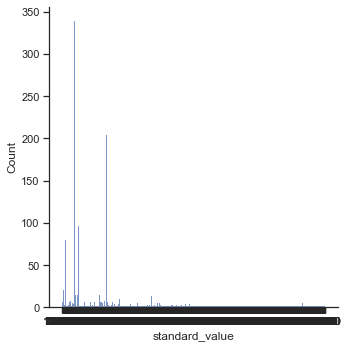

In [26]:
sns.displot(merged_bioactivity_data, x='standard_value')

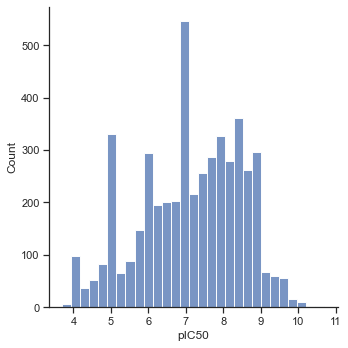

In [27]:
sns.displot(merged_bioactivity_data, x='pIC50')

In [28]:
# Delete the columns before transformation
merged_bioactivity_data = merged_bioactivity_data.drop(['standard_value', 'standard_value_norm'], axis=1)
merged_bioactivity_data.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MolWt,MolLogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL185238,Cc1cccc(-c2n[nH]cc2-c2ccc3ncccc3n2)n1,inactive,287.326,3.39032,1,4,4.795880
1,CHEMBL371694,CC(C)(C)c1nc(-c2ccc(F)cc2)c(-c2ccncc2)[nH]1,active,295.361,4.57530,1,2,6.045757
2,CHEMBL200259,OCc1cccc(-c2[nH]c(-c3ccccc3)nc2-c2ccncc2)c1,intermediate,327.387,4.29800,2,3,5.799971
3,CHEMBL68215,Oc1ccc(-c2[nH]c(-c3ccccc3)nc2-c2ccncc2)cc1,active,313.360,4.51130,2,3,6.469800
4,CHEMBL200863,CC(C)(CNC(=O)Nc1ccc(Cl)cc1)c1nc(-c2ccc(Cl)c(O)...,active,496.398,6.25040,4,4,7.886057


In [29]:
merged_bioactivity_data.to_csv('bioactivity_data_3_classes_pIC50.csv', index=False)

In [30]:
# Remove the intermediate bioactivity class
two_classes_df = merged_bioactivity_data[merged_bioactivity_data.bioactivity_class != 'intermediate']
two_classes_df

,molecule_chembl_id,canonical_smiles,bioactivity_class,MolWt,MolLogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL185238,Cc1cccc(-c2n[nH]cc2-c2ccc3ncccc3n2)n1,inactive,287.326,3.39032,1,4,4.795880
1,CHEMBL371694,CC(C)(C)c1nc(-c2ccc(F)cc2)c(-c2ccncc2)[nH]1,active,295.361,4.57530,1,2,6.045757
3,CHEMBL68215,Oc1ccc(-c2[nH]c(-c3ccccc3)nc2-c2ccncc2)cc1,active,313.360,4.51130,2,3,6.469800
4,CHEMBL200863,CC(C)(CNC(=O)Nc1ccc(Cl)cc1)c1nc(-c2ccc(Cl)c(O)...,active,496.398,6.25040,4,4,7.886057
5,CHEMBL381447,CC(C)(CNS(C)(=O)=O)c1nc(-c2ccc(Cl)c(O)c2)c(-c2...,active,420.922,3.32450,3,5,7.853872
...,...,...,...,...,...,...,...,...
4842,CHEMBL5186595,Nc1nccc(-c2sc(C3COCCN3)nc2-c2cccc(NS(=O)(=O)c3...,active,548.572,3.72830,3,9,8.221849
4843,CHEMBL5195570,NCCCc1nc(-c2cccc(NS(=O)(=O)c3cc(F)ccc3F)c2F)c(...,active,520.562,3.95870,3,8,8.200659
4844,CHEMBL5197265,CC(=O)Nc1nccc(-c2sc(CCCN)nc2-c2cccc(NS(=O)(=O)...,active,562.599,4.33490,3,8,8.119186
4845,CHEMBL5193921,CCN(C)S(=O)(=O)Nc1cccc(-c2nc(C(C)(C)C)sc2-c2cc...,active,446.602,3.75520,2,7,7.920819


## Frequency plot of the bioactivity classes

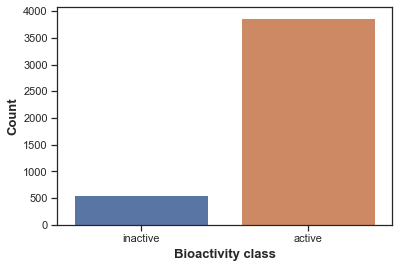

In [31]:
sns.countplot(data=two_classes_df, x='bioactivity_class')
plt.xlabel('Bioactivity class', fontsize=13, fontweight='bold')
plt.ylabel('Count', fontsize=13, fontweight='bold')
plt.savefig('plot_bioactivity_class.pdf')

## Scatter plot of MolWt vs MolLogP

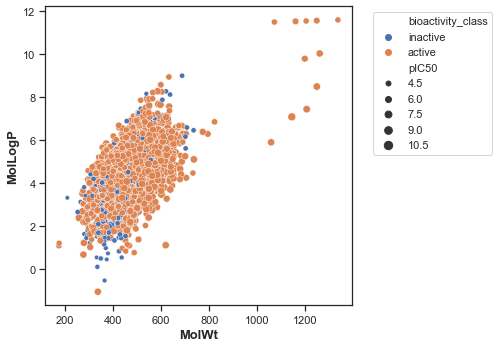

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(data=two_classes_df, x='MolWt', y='MolLogP', hue='bioactivity_class', size='pIC50')
plt.xlabel('MolWt', fontsize=13, fontweight='bold')
plt.ylabel('MolLogP', fontsize=13, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.savefig('MolWt_vs_MolLogP.pdf')

## Boxplots of the two classes

### pIC50

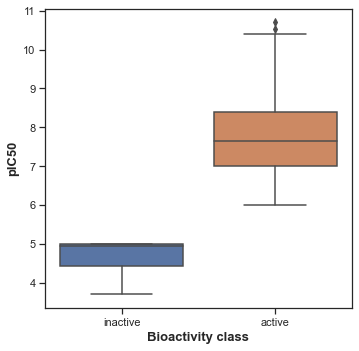

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(data=two_classes_df, x='bioactivity_class', y='pIC50')
plt.xlabel('Bioactivity class', fontsize=13, fontweight='bold')
plt.ylabel('pIC50', fontsize=13, fontweight='bold')
plt.savefig('pIC50_boxplot.pdf')

## Statistical Analysis (Mann-Whitney U Test)

In [34]:
from scipy.stats import mannwhitneyu

In [35]:
def mann_whitney(data, descriptor):
    # Set seed
    np.random.seed(0)

    # Get descriptor values of each class
    active = data[data.bioactivity_class == 'active'][descriptor]
    inactive = data[data.bioactivity_class == 'inactive'][descriptor]

    # Compare
    stat, p = mannwhitneyu(active, inactive)
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    # Store results in a df
    res = pd.DataFrame({
        'Descriptor': descriptor,
        'Statistics': stat,
        'p': p,
        'alpha': alpha,
        'interpretation': interpretation
    }, index=[0])

    return res


In [36]:
mann_whitney(two_classes_df, 'pIC50')

,Descriptor,Statistics,p,alpha,interpretation
0,pIC50,2170000.0,0.0,0.05,Different distribution (reject H0)


### MolWt

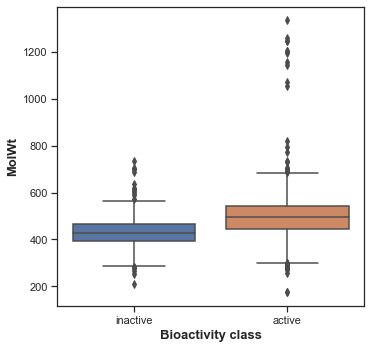

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(data=two_classes_df, x='bioactivity_class', y='MolWt')
plt.xlabel('Bioactivity class', fontsize=13, fontweight='bold')
plt.ylabel('MolWt', fontsize=13, fontweight='bold')
plt.savefig('MolWt_boxplot.pdf')

In [38]:
mann_whitney(two_classes_df, 'MolWt')

,Descriptor,Statistics,p,alpha,interpretation
0,MolWt,1642963.5,2.148098e-86,0.05,Different distribution (reject H0)


### MolLogP

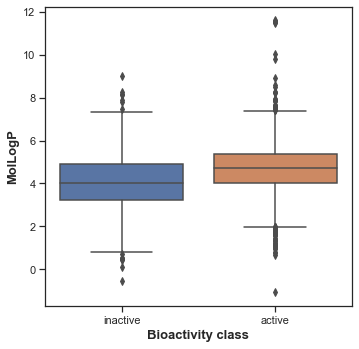

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(data=two_classes_df, x='bioactivity_class', y='MolLogP')
plt.xlabel('Bioactivity class', fontsize=13, fontweight='bold')
plt.ylabel('MolLogP', fontsize=13, fontweight='bold')
plt.savefig('MolLogP_boxplot.pdf')

In [40]:
mann_whitney(two_classes_df, 'MolLogP')

,Descriptor,Statistics,p,alpha,interpretation
0,MolLogP,1421879.0,1.267354e-32,0.05,Different distribution (reject H0)


### NumHDonors

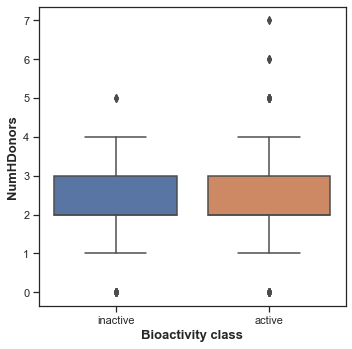

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(data=two_classes_df, x='bioactivity_class', y='NumHDonors')
plt.xlabel('Bioactivity class', fontsize=13, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=13, fontweight='bold')
plt.savefig('NumHDonors_boxplot.pdf')

In [42]:
mann_whitney(two_classes_df, 'NumHDonors')

,Descriptor,Statistics,p,alpha,interpretation
0,NumHDonors,1290690.5,1.211776e-14,0.05,Different distribution (reject H0)


### NumHAcceptors

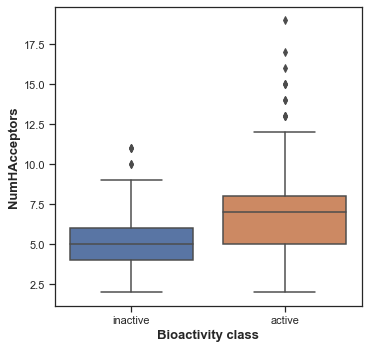

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(data=two_classes_df, x='bioactivity_class', y='NumHAcceptors')
plt.xlabel('Bioactivity class', fontsize=13, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=13, fontweight='bold')
plt.savefig('NumHAcceptors_boxplot.pdf')

In [44]:
mann_whitney(two_classes_df, 'NumHAcceptors')

,Descriptor,Statistics,p,alpha,interpretation
0,NumHAcceptors,1485903.0,1.268136e-46,0.05,Different distribution (reject H0)


**Interpretation of Statistical Results**

With respect to pIC50, active and inactive classes showed statistically significant differences, which was not surprising due to the fact that we have created this classes thresholding the IC50 values (Actives: IC50 <= 1000nM, Inactives: IC50 >= 10000nM).

With respect to the Lipinski descriptors, all of them (MolWt, MolLogP, NumHDonors, and NumHAcceptors) showed statistically significant differences between actives and inactives.